# **Term Deposit Prediction**

In [152]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [153]:
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Matplotlib Version : {matplotlib.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Pandas Version : 1.5.3
Numpy Version : 1.26.4
Matplotlib Version : 3.8.0
Seaborn Version : 0.13.0


In [156]:
df = pd.read_csv("new_train.csv")
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
15674,53,housemaid,married,basic.4y,unknown,yes,no,telephone,aug,thu,51,7,999,0,nonexistent,no
30677,49,services,married,high.school,no,no,no,cellular,jun,tue,239,4,999,0,nonexistent,yes
3167,31,services,divorced,high.school,no,yes,no,cellular,nov,mon,266,2,999,0,nonexistent,no
8365,59,retired,married,university.degree,unknown,no,yes,cellular,aug,fri,140,4,999,0,nonexistent,no
12547,24,services,single,high.school,no,no,no,cellular,may,fri,576,4,999,1,failure,yes


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [158]:
def format_val(val):
    return "{:,.2f}K".format(val/1000)

def format_percen(val):
    return "{:,.2f}%".format(val)

def plot_label(data, format):
    format_vis = format
    if format_vis.lower() == 'percentage':
        for vis_plot in data.patches:
            plt.annotate(format_percen(vis_plot.get_height()), 
                        (vis_plot.get_x()+vis_plot.get_width()/2., vis_plot.get_height()),
                        va='center', ha='center',
                        xytext=(0,10),
                        textcoords="offset points")
    else :
        for vis_plot in data.patches:
            plt.annotate(format_val(vis_plot.get_height()), 
                        (vis_plot.get_x()+vis_plot.get_width()/2., vis_plot.get_height()),
                        va='center', ha='center',
                        xytext=(0,10),
                        textcoords="offset points")

## **Univariate Analysis**

In [159]:
numerical = df.select_dtypes('int64').columns.to_list()
categorical = df.select_dtypes('object').columns.to_list()

In [160]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
age,32950.0,40.014112,10.403636,17.0,32.0,38.0,47.0,98.0
duration,32950.0,258.127466,258.975917,0.0,103.0,180.0,319.0,4918.0
campaign,32950.0,2.560607,2.752326,1.0,1.0,2.0,3.0,56.0
pdays,32950.0,962.052413,187.951096,0.0,999.0,999.0,999.0,999.0
previous,32950.0,0.174719,0.499025,0.0,0.0,0.0,0.0,7.0


In [161]:
df[categorical].describe().T

,count,unique,top,freq
job,32950,12,admin.,8314
marital,32950,4,married,19953
education,32950,8,university.degree,9736
default,32950,3,no,26007
housing,32950,3,yes,17254
loan,32950,3,no,27131
contact,32950,2,cellular,20908
month,32950,10,may,11011
day_of_week,32950,5,thu,6857
poutcome,32950,3,nonexistent,28416


##### Numerical Data

In [162]:
for vis_num in range(0, len(numerical)):
    print(f"Columns : {numerical[vis_num]}")
    print(f"Unique Value : {df[numerical[vis_num]].value_counts()}")
    print(f"")

Columns : age
Unique Value : 31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64

Columns : duration
Unique Value : 90      147
124     139
136     138
85      137
97      133
       ... 
1285      1
2203      1
1848      1
1248      1
1434      1
Name: duration, Length: 1467, dtype: int64

Columns : campaign
Unique Value : 1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: campaign, dtype: int64

Columns : pdays
Unique Value : 999    31724
3        355
6 

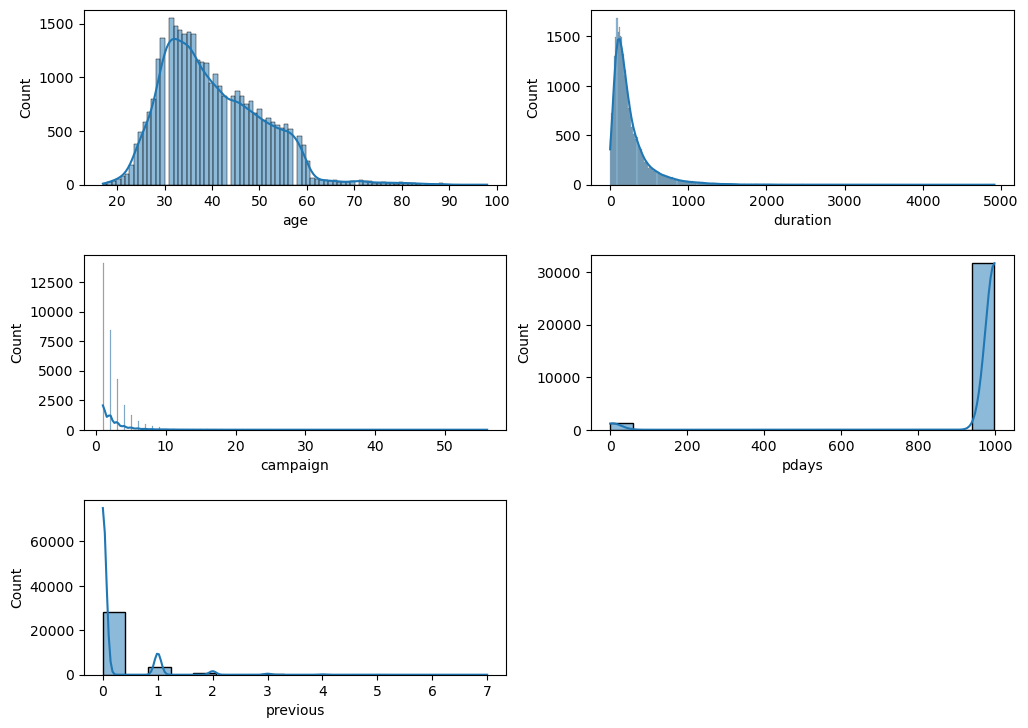

In [163]:
plt.figure(figsize=(12,15))
for vis_num in range(0, len(numerical)):
    plt.subplot(5,2, vis_num+1)
    plt.subplots_adjust(hspace=0.4)
    sns.histplot(data=df[numerical[vis_num]], kde=True)

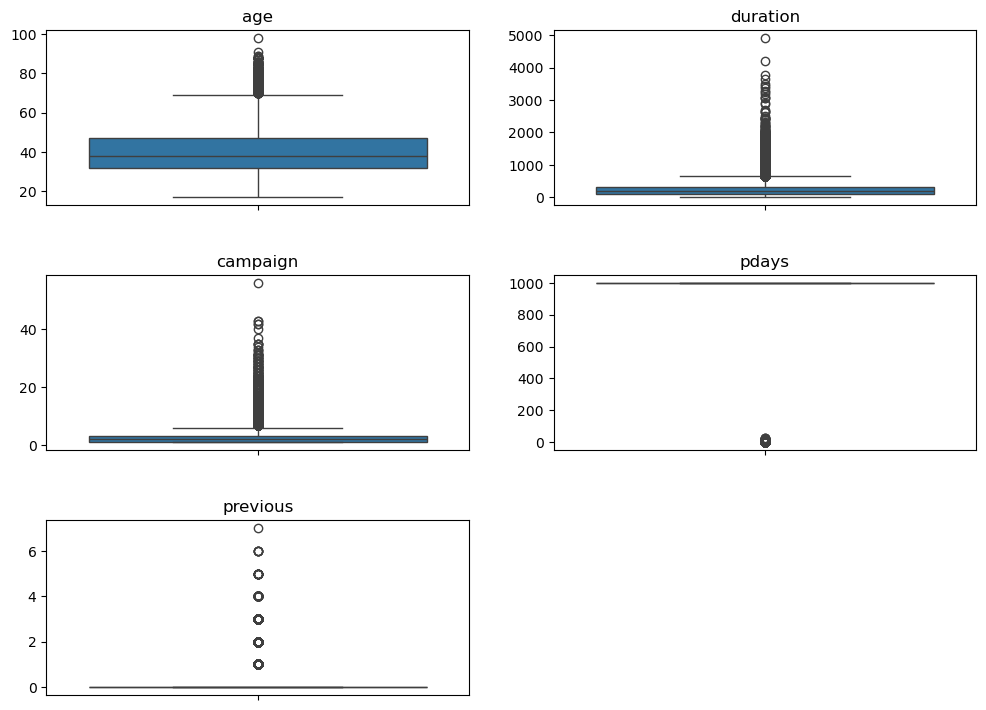

In [164]:
plt.figure(figsize=(12,15))
for vis_num in range(0, len(numerical)):
    plt.subplot(5,2, vis_num+1)
    plt.subplots_adjust(hspace=0.4)
    plt.title(  numerical[vis_num])
    sns.boxplot(data=df[numerical[vis_num]])
    plt.ylabel("")

plt.show()

Terdapat beberapa kolom numerical yang memiliki nilai outlier yang cukup ekstrem, kolom tersebut adalah : 
- age
- duration
- campaign
- pdays
- previous

##### Categorical Data

In [165]:
for vis_cat in range(0, len(categorical)):
    print(f"Columns : {categorical[vis_cat]}")
    print(f"Unique Value : {df[categorical[vis_cat]].value_counts()}")
    print(f"")

Columns : job
Unique Value : admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

Columns : marital
Unique Value : married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

Columns : education
Unique Value : university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

Columns : default
Unique Value : no         26007
unknown     6940
yes            3
Name: default, dtype: int64

Columns : housing
Unique Value : yes        17254
no         14900
unknown      796
Name: housing, dtype: int64

Columns : loan
Unique Value : no

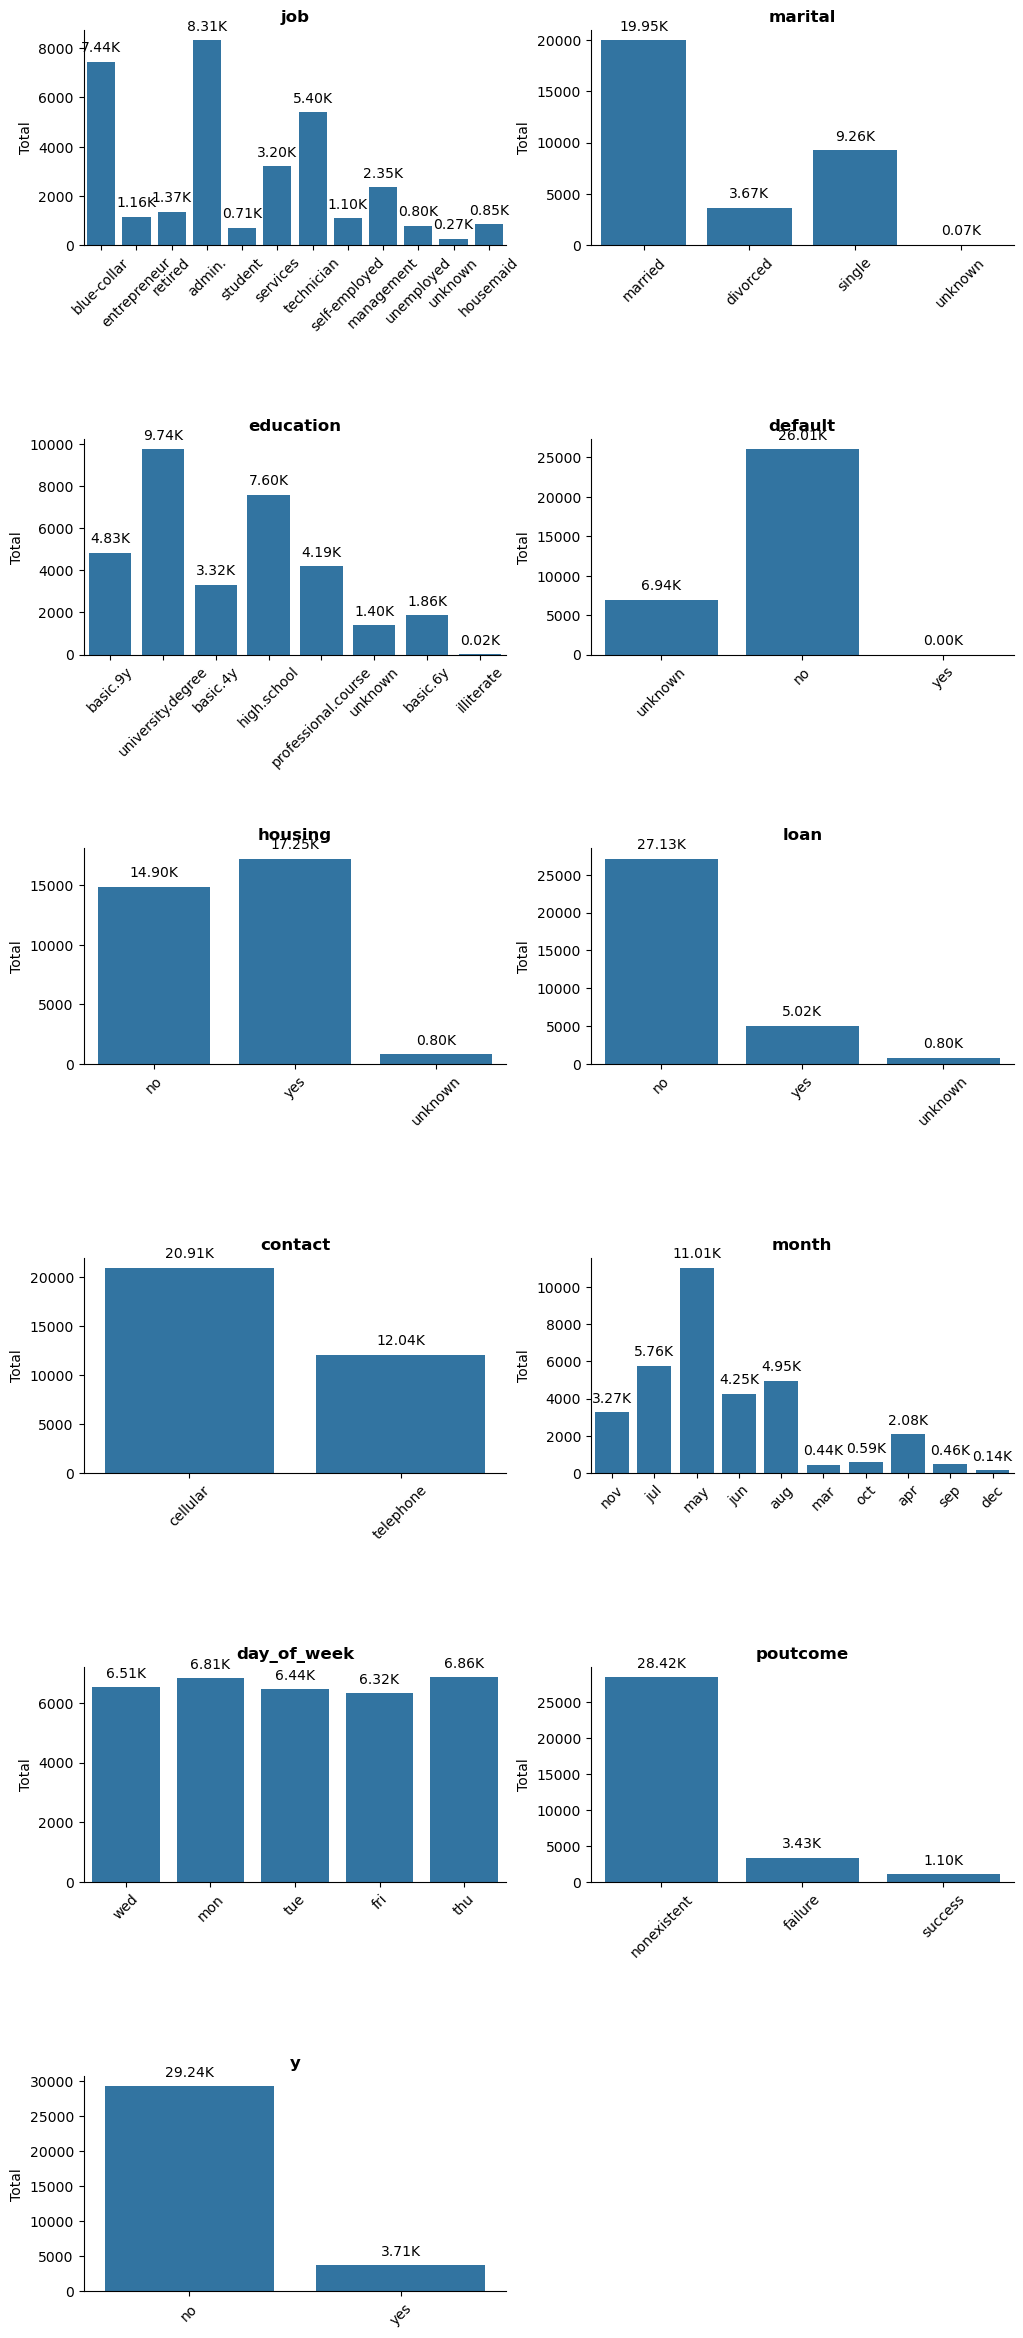

In [166]:
plt.figure(figsize=(12,40))
for vis_cat in range(0, len(categorical)):
    plt.subplot(8,2, vis_cat+1)
    plt.subplots_adjust(hspace=0.9)
    vis = sns.countplot(data=df, x=categorical[vis_cat])
    sns.despine()
    plt.title(categorical[vis_cat], weight='bold')
    plt.xlabel("")
    plt.ylabel("Total")
    plot_label(vis, 'normal')
    plt.xticks(rotation=45)

Terdapat feature (columns) yang memiliki 1 values dominan, yakni : 
- default

## **Bivariate Analysis**

In [167]:
#Make Function
def group_bivariate(data, column1, column2):
    biv_group = data.groupby(column1)[column2].value_counts().reset_index(name='sum')
    biv_group['total'] = biv_group.groupby(column2)['sum'].transform(sum)
    biv_group['percentage'] = round(((biv_group['sum']/biv_group['total'])*100), 2)
    return biv_group

In [168]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [169]:
df_age = df.copy()

In [170]:
val_age = []

for age in df_age['age']:
    if age <= 20:
        val = '<20'
    elif age > 20 and age <= 30:
        val = '20 - 30'
    elif age > 30 and age <= 40:
        val = '30 - 40'
    elif age > 40 and age <= 50:
        val = '40 - 50'
    elif age > 50 and age <= 60:
        val = '50 - 60'
    else:
        val = '>60'
    val_age.append(val)
    
df_age['age_group'] = val_age

In [171]:
biv_age = group_bivariate(df_age, 'age_group', 'y')
biv_age.head()

,age_group,y,sum,total,percentage
0,20 - 30,no,4953,29238,16.94
1,20 - 30,yes,872,3712,23.49
2,30 - 40,no,11805,29238,40.38
3,30 - 40,yes,1261,3712,33.97
4,40 - 50,no,7514,29238,25.70


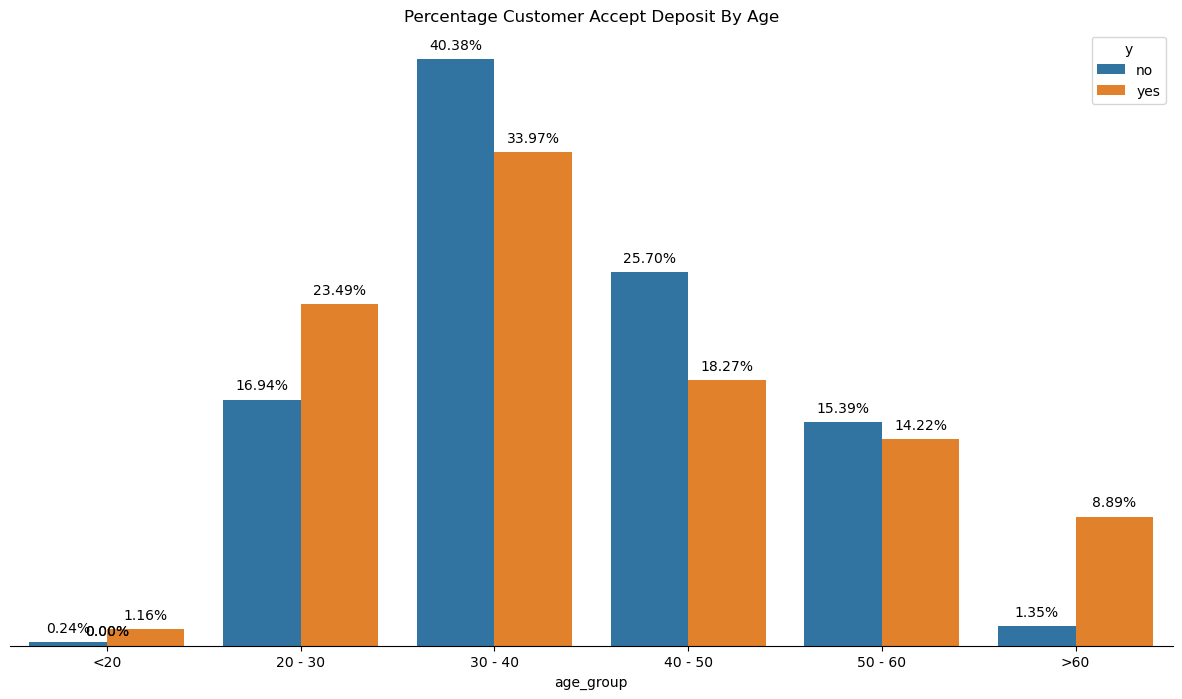

In [172]:
plt.figure(figsize=(15,8))
order = ['<20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '>60']
vis = sns.barplot(data=biv_age, x='age_group', y='percentage', hue='y', order=order)
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Age")
plot_label(vis, "percentage")

In [173]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [174]:
biv_job = group_bivariate(df, 'job', 'y')
biv_job.head()

,job,y,sum,total,percentage
0,admin.,no,7244,29238,24.78
1,admin.,yes,1070,3712,28.83
2,blue-collar,no,6926,29238,23.69
3,blue-collar,yes,515,3712,13.87
4,entrepreneur,no,1060,29238,3.63


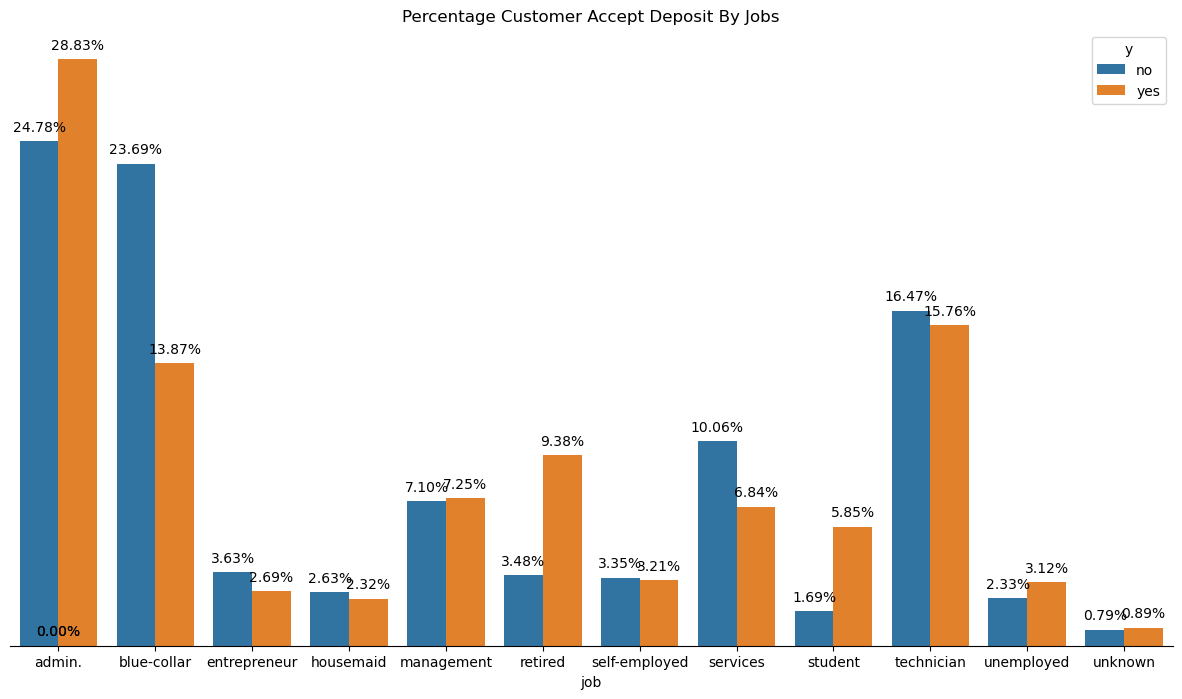

In [175]:
plt.figure(figsize=(15,8))
vis = sns.barplot(data=biv_job, x='job', y='percentage', hue='y')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Jobs")
plot_label(vis, "percentage")

In [176]:
biv_marital = group_bivariate(df, 'marital', 'y')
biv_marital.head()

,marital,y,sum,total,percentage
0,divorced,no,3304,29238,11.30
1,divorced,yes,371,3712,9.99
2,married,no,17933,29238,61.33
3,married,yes,2020,3712,54.42
4,single,no,7947,29238,27.18


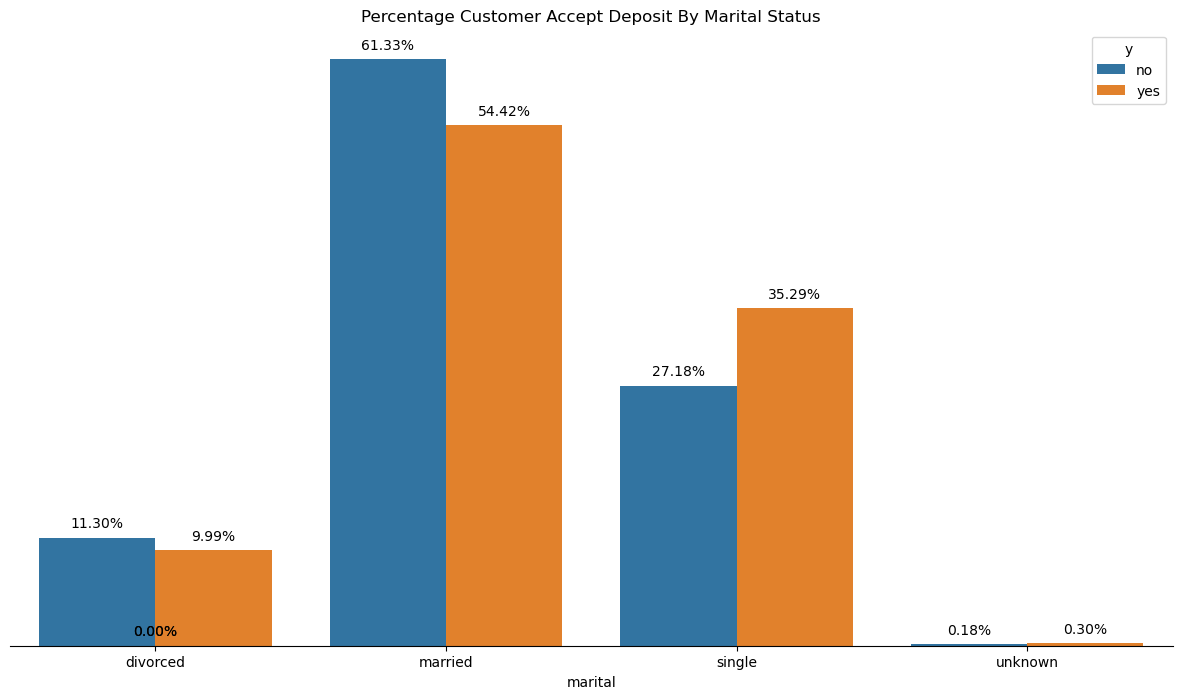

In [177]:
plt.figure(figsize=(15,8))
vis = sns.barplot(data=biv_marital, x='marital', y='percentage', hue='y')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Marital Status")
plot_label(vis, "percentage")

In [178]:
biv_edu = group_bivariate(df, 'education', 'y')
biv_edu.head()

,education,y,sum,total,percentage
0,basic.4y,no,2978,29238,10.19
1,basic.4y,yes,344,3712,9.27
2,basic.6y,no,1709,29238,5.85
3,basic.6y,yes,156,3712,4.20
4,basic.9y,no,4457,29238,15.24


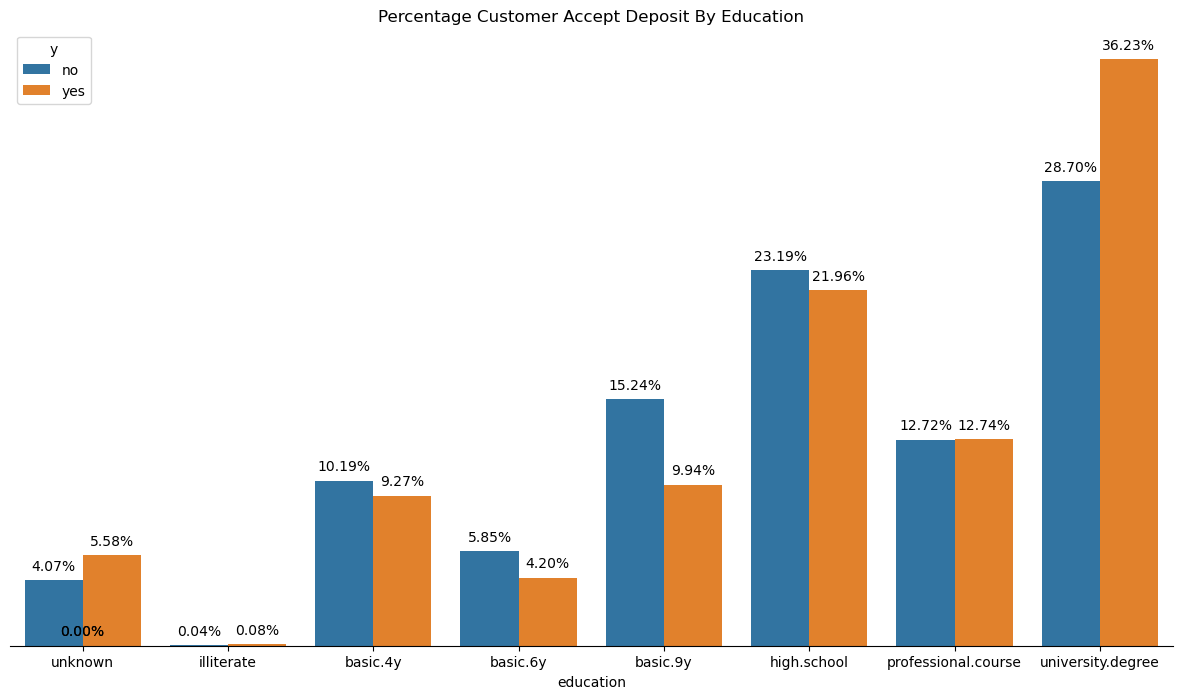

In [179]:
plt.figure(figsize=(15,8))
order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
vis = sns.barplot(data=biv_edu, x='education', y='percentage', hue='y', order=order)
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Education")
plot_label(vis, "percentage")

In [180]:
biv_default = group_bivariate(df, 'default', 'y')
biv_default.head()

,default,y,sum,total,percentage
0,no,no,22656,29238,77.49
1,no,yes,3351,3712,90.27
2,unknown,no,6579,29238,22.50
3,unknown,yes,361,3712,9.73
4,yes,no,3,29238,0.01


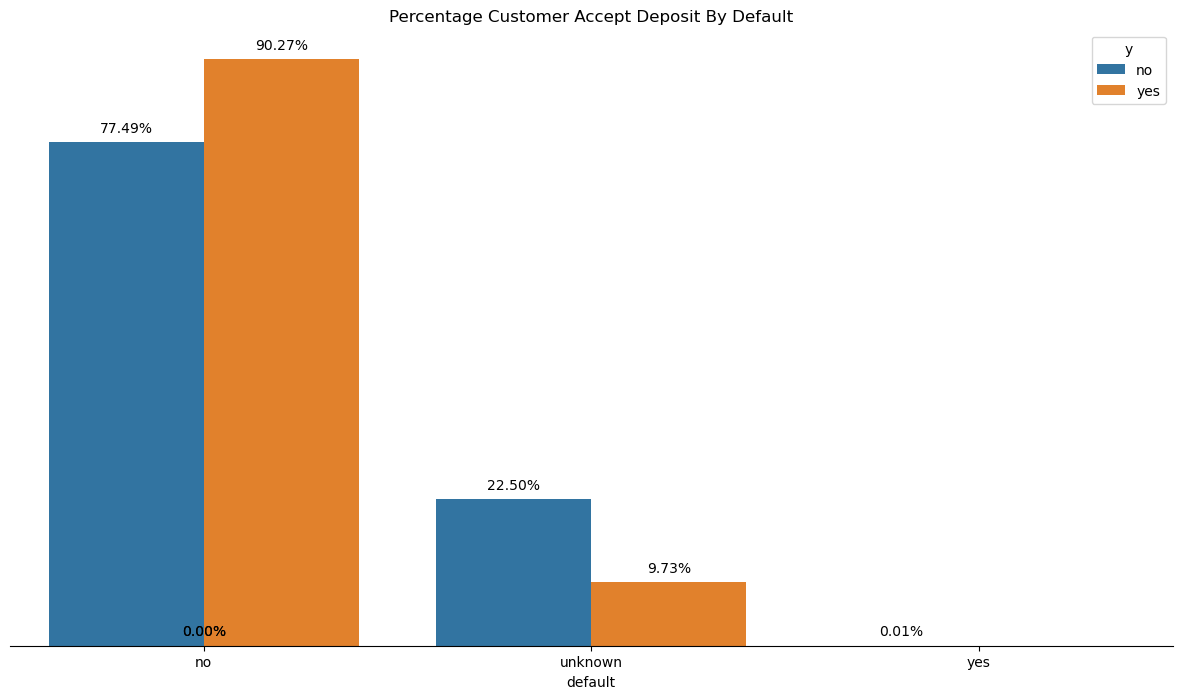

In [181]:
plt.figure(figsize=(15,8))
vis = sns.barplot(data=biv_default, x='default', y='percentage', hue='y')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Default")
plot_label(vis, "percentage")

In [182]:
biv_housing = group_bivariate(df, 'housing', 'y')
biv_housing.head()

,housing,y,sum,total,percentage
0,no,no,13272,29238,45.39
1,no,yes,1628,3712,43.86
2,unknown,no,706,29238,2.41
3,unknown,yes,90,3712,2.42
4,yes,no,15260,29238,52.19


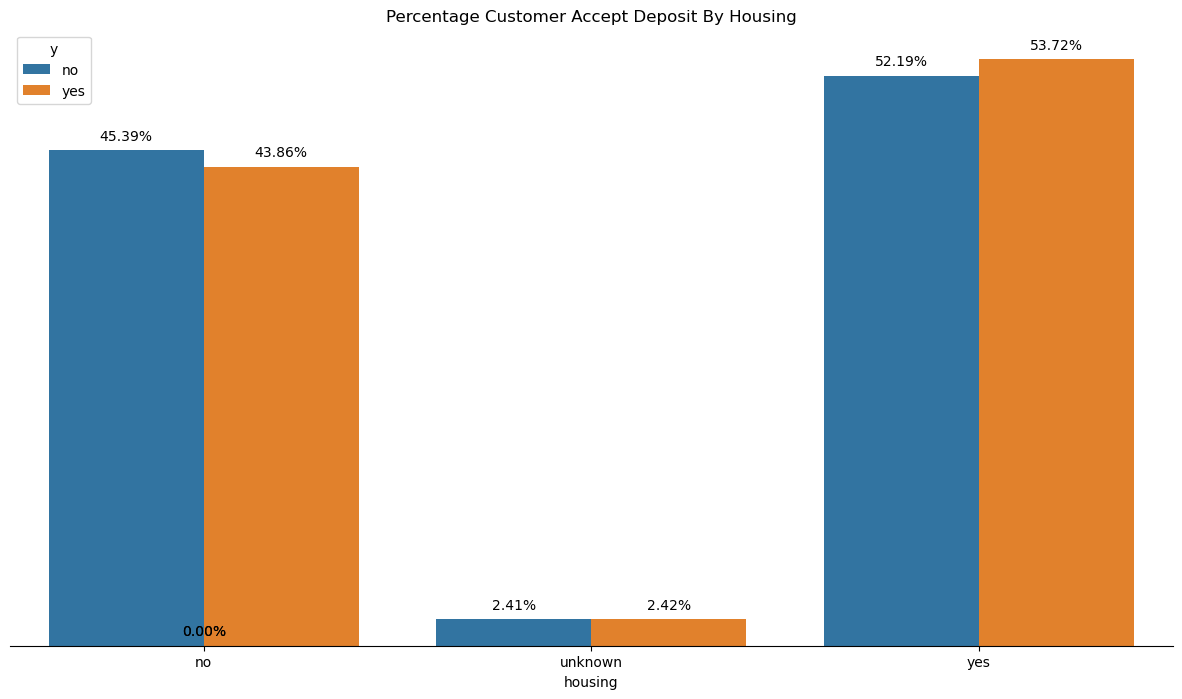

In [183]:
plt.figure(figsize=(15,8))
vis = sns.barplot(data=biv_housing, x='housing', y='percentage', hue='y')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Housing")
plot_label(vis, "percentage")

In [184]:
biv_loan = group_bivariate(df, 'loan', 'y')
biv_loan.head()

,loan,y,sum,total,percentage
0,no,no,24073,29238,82.33
1,no,yes,3058,3712,82.38
2,unknown,no,706,29238,2.41
3,unknown,yes,90,3712,2.42
4,yes,no,4459,29238,15.25


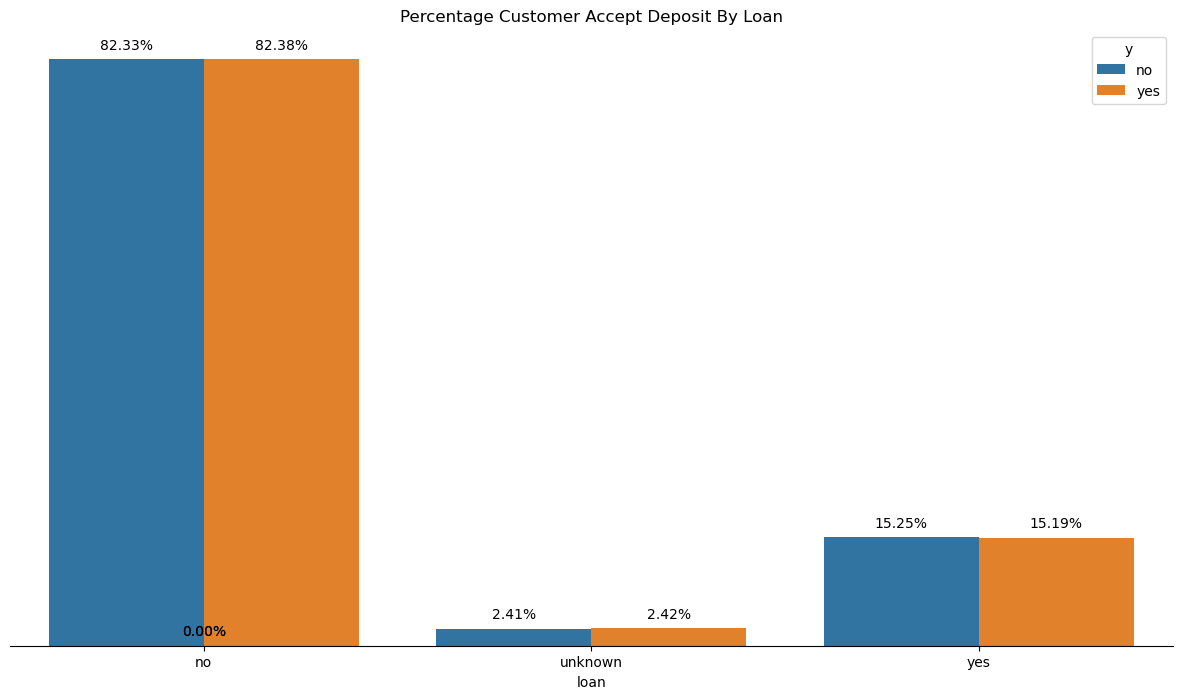

In [185]:
plt.figure(figsize=(15,8))
vis = sns.barplot(data=biv_loan, x='loan', y='percentage', hue='y')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Loan")
plot_label(vis, "percentage")

In [186]:
biv_contact = group_bivariate(df, 'contact', 'y')
biv_contact.head()

,contact,y,sum,total,percentage
0,cellular,no,17834,29238,61.00
1,cellular,yes,3074,3712,82.81
2,telephone,no,11404,29238,39.00
3,telephone,yes,638,3712,17.19


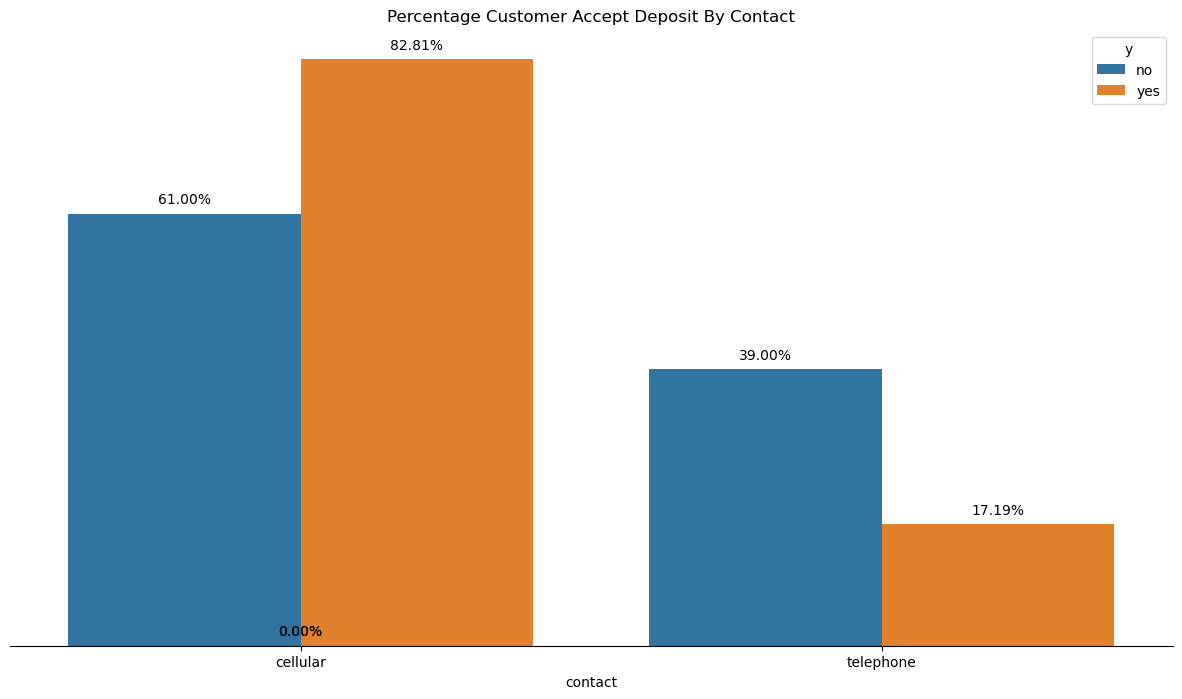

In [187]:
plt.figure(figsize=(15,8))
vis = sns.barplot(data=biv_contact, x='contact', y='percentage', hue='y')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Contact")
plot_label(vis, "percentage")

In [188]:
biv_month = group_bivariate(df, 'month', 'y')
biv_month.head()

,month,y,sum,total,percentage
0,apr,no,1658,29238,5.67
1,apr,yes,427,3712,11.50
2,aug,no,4417,29238,15.11
3,aug,yes,531,3712,14.30
4,dec,yes,72,3712,1.94


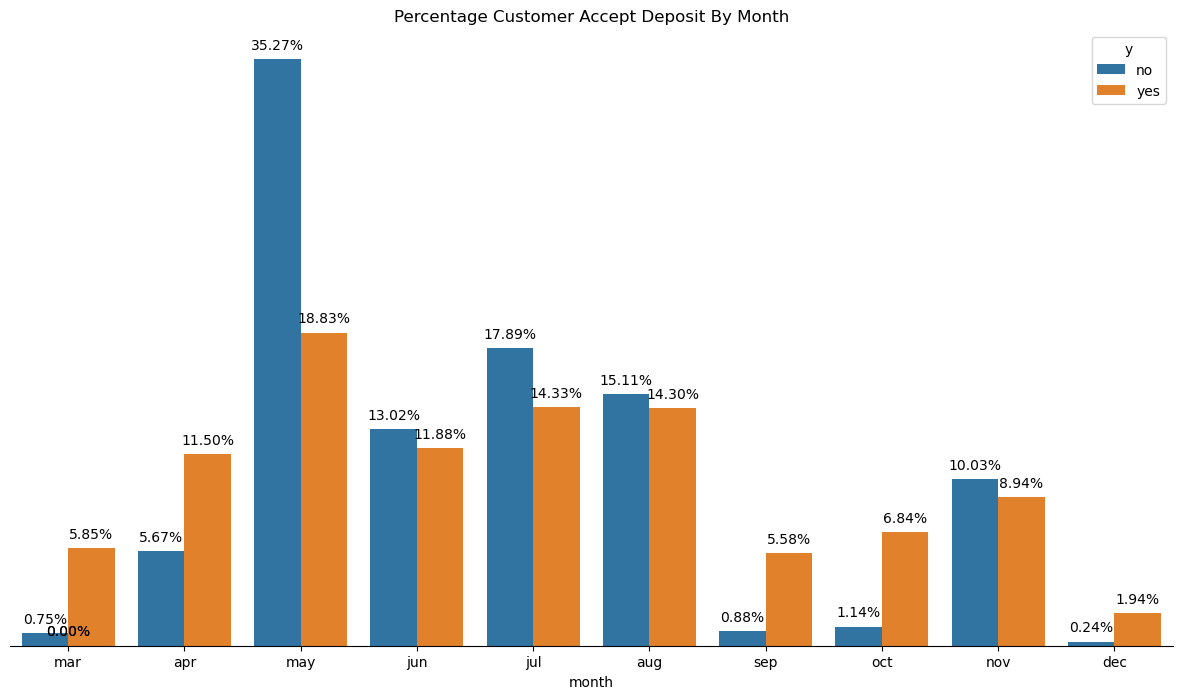

In [189]:
plt.figure(figsize=(15,8))
order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
vis = sns.barplot(data=biv_month, x='month', y='percentage', hue='y', order=order)
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Month")
plot_label(vis, "percentage")

In [191]:
biv_day = group_bivariate(df, 'day_of_week', 'y')
biv_day.head()

,day_of_week,y,sum,total,percentage
0,fri,no,5632,29238,19.26
1,fri,yes,690,3712,18.59
2,mon,no,6114,29238,20.91
3,mon,yes,698,3712,18.80
4,thu,no,6034,29238,20.64


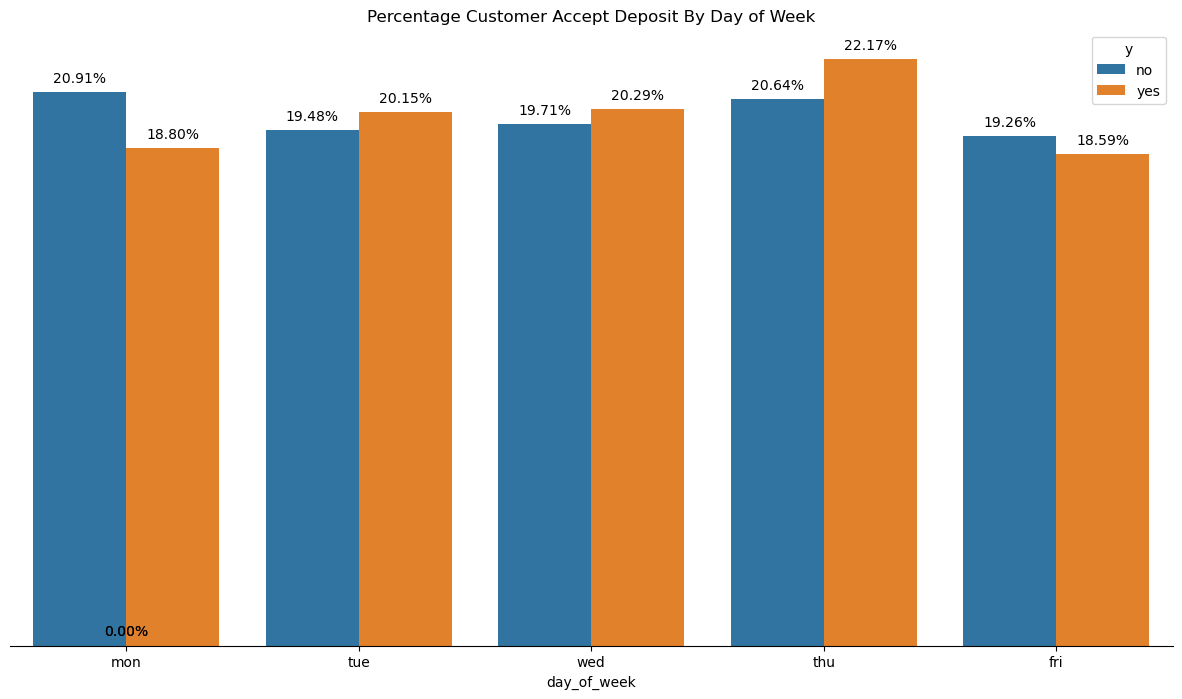

In [192]:
plt.figure(figsize=(15,8))
order = ['mon', 'tue', 'wed', 'thu', 'fri']
vis = sns.barplot(data=biv_day, x='day_of_week', y='percentage', hue='y', order=order)
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Day of Week")
plot_label(vis, "percentage")

In [193]:
biv_poutcome = group_bivariate(df, 'poutcome', 'y')
biv_poutcome.head()

,poutcome,y,sum,total,percentage
0,failure,no,2935,29238,10.04
1,failure,yes,494,3712,13.31
2,nonexistent,no,25915,29238,88.63
3,nonexistent,yes,2501,3712,67.38
4,success,yes,717,3712,19.32


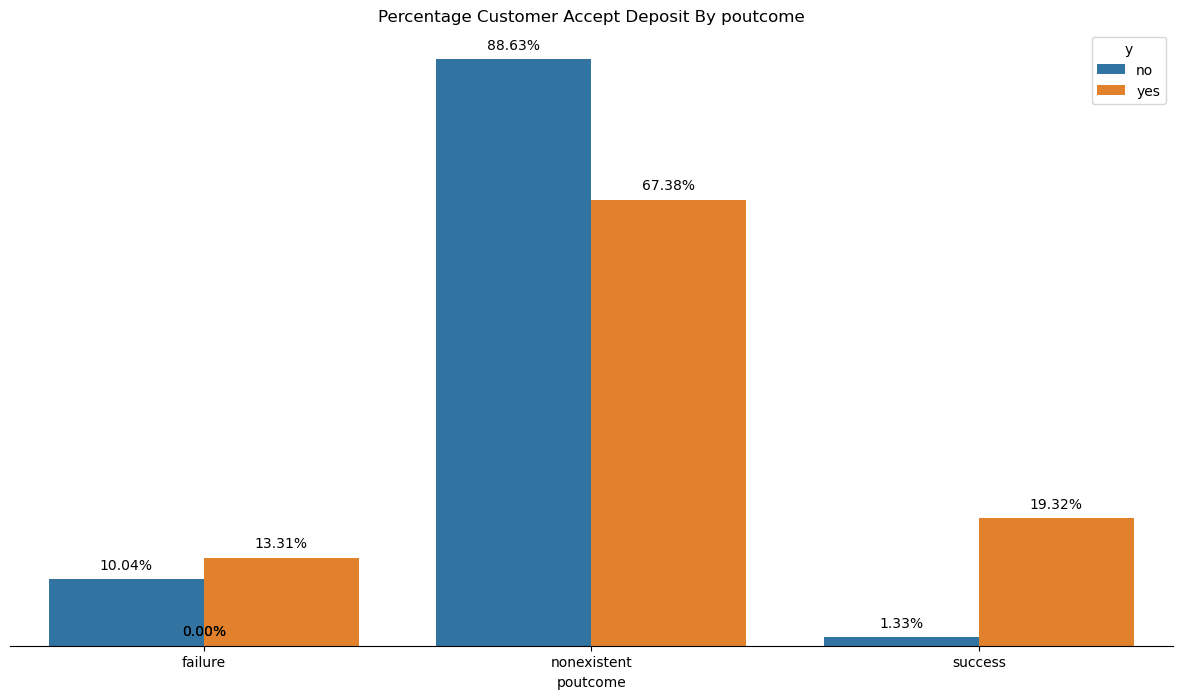

In [194]:
plt.figure(figsize=(15,8))
vis = sns.barplot(data=biv_poutcome, x='poutcome', y='percentage', hue='y')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By poutcome")
plot_label(vis, "percentage")

#### New Feature (Total Campaign)

In [195]:
df_1 = df
sum_campaign = []

for val in df['campaign']:
    if val == 1 :
        nil = "1"
    elif val == 2 :
        nil = "2"
    elif val == 3 :
        nil = "3"
    elif val == 4 :
        nil = "4"
    elif val == 5 :
        nil = "5"
    elif val == 6 :
        nil = "6"
    elif val == 7 :
        nil = "7"
    elif val == 8 :
        nil = "8"
    elif val == 9 :
        nil = "9" 
    elif val == 10 :
        nil = "10"
    else :
        nil = ">10"
    sum_campaign.append(nil)

df_1['sum_campaign'] = sum_campaign

In [196]:
biv_camp = group_bivariate(df_1, 'sum_campaign', 'y')
biv_camp.sample(3)

,sum_campaign,y,sum,total,percentage
19,9,yes,12,3712,0.32
17,8,yes,13,3712,0.35
12,6,no,710,29238,2.43


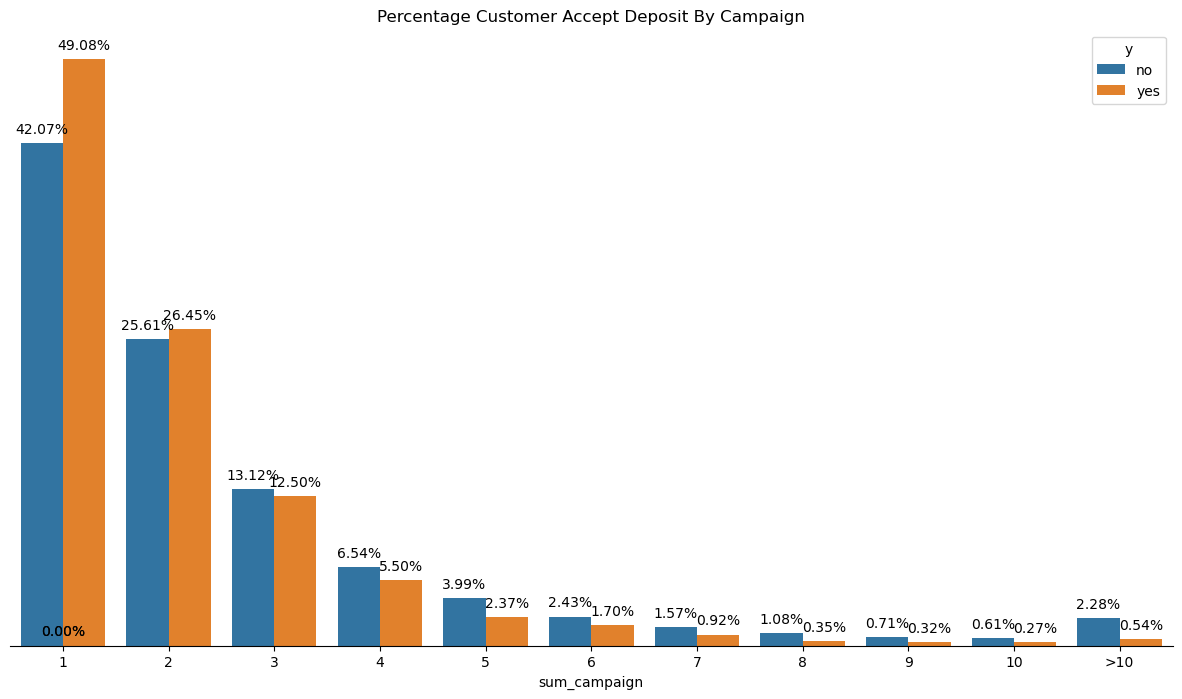

In [197]:
plt.figure(figsize=(15,8))
order = ['1','2','3','4','5','6','7','8','9','10','>10']
vis = sns.barplot(data=biv_camp, x='sum_campaign', y='percentage', hue='y', order=order)
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.title("Percentage Customer Accept Deposit By Campaign")
plot_label(vis, "percentage")

## **Multivariate Analysis**

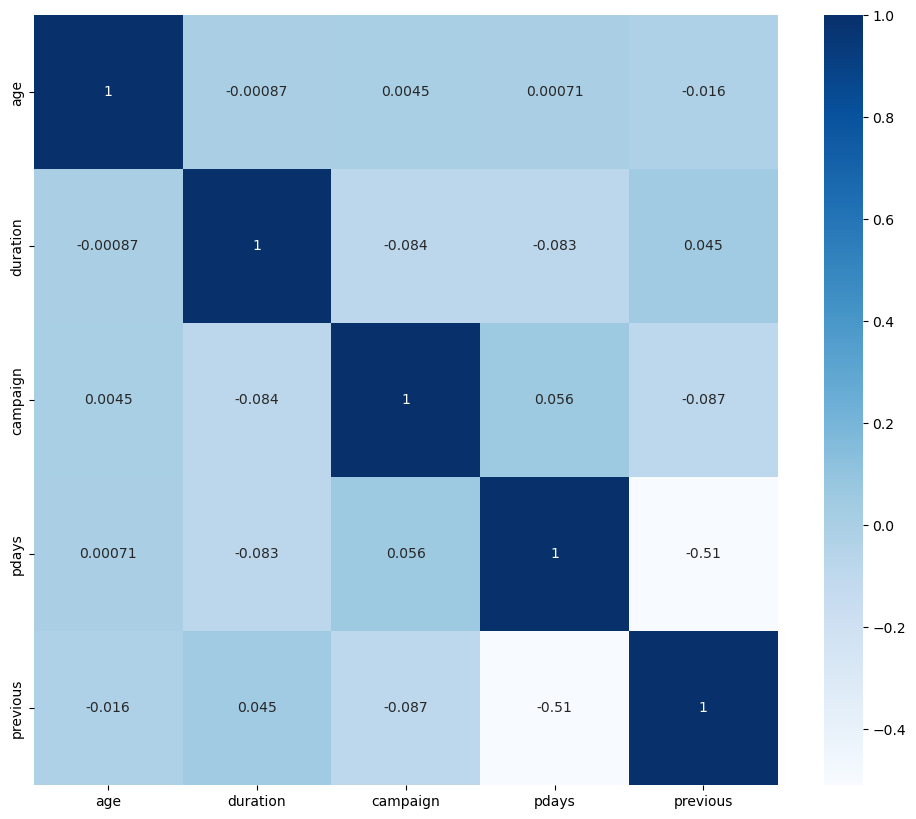

In [198]:
corr = df.corr(method='spearman')

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='Blues')

plt.show()

## **Data Preprocessing**

#### Handling Missing Value

In [199]:
for mis_val in range(0, len(df.columns)):
    print(f"Columns : {df.columns[mis_val]}")
    print(f"Total Missing Value : {df[df.columns[mis_val]].isnull().sum()}")
    print(f"Percentage Missing Value : {(df[df.columns[mis_val]].isnull().sum())/(df.shape[0])*100}%" )
    print('')

Columns : age
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : job
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : marital
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : education
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : default
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : housing
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : loan
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : contact
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : month
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : day_of_week
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : duration
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : campaign
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : pdays
Total Missing Value : 0
Percentage Missing Value : 0.0%

Columns : previous
Total Missing

#### Handling Duplicated Data

In [200]:
print(f"Total Data Duplicated : {df.duplicated().sum()}")

Total Data Duplicated : 8


In [201]:
print(f"Data Sebelum Handling Duplicated Data : {df.shape}")
df = df.drop_duplicates()
print(f"Total Data Duplicated : {df.duplicated().sum()}")
print(f"Data Setelah Handling Duplicated Data : {df.shape}")

Data Sebelum Handling Duplicated Data : (32950, 17)
Total Data Duplicated : 0
Data Setelah Handling Duplicated Data : (32942, 17)


#### Handling Outlier

In [202]:
df_bef_out = df
col_out = ['age', 'campaign']

for val_out in range(0, len(col_out)):
    Q1 = df[col_out[val_out]].quantile(0.25)
    Q3 = df[col_out[val_out]].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    upp_bound = Q3 + 1.5 * IQR
    df = (df[(df[col_out[val_out]] >= low_bound) & (df[col_out[val_out]] <= upp_bound)])

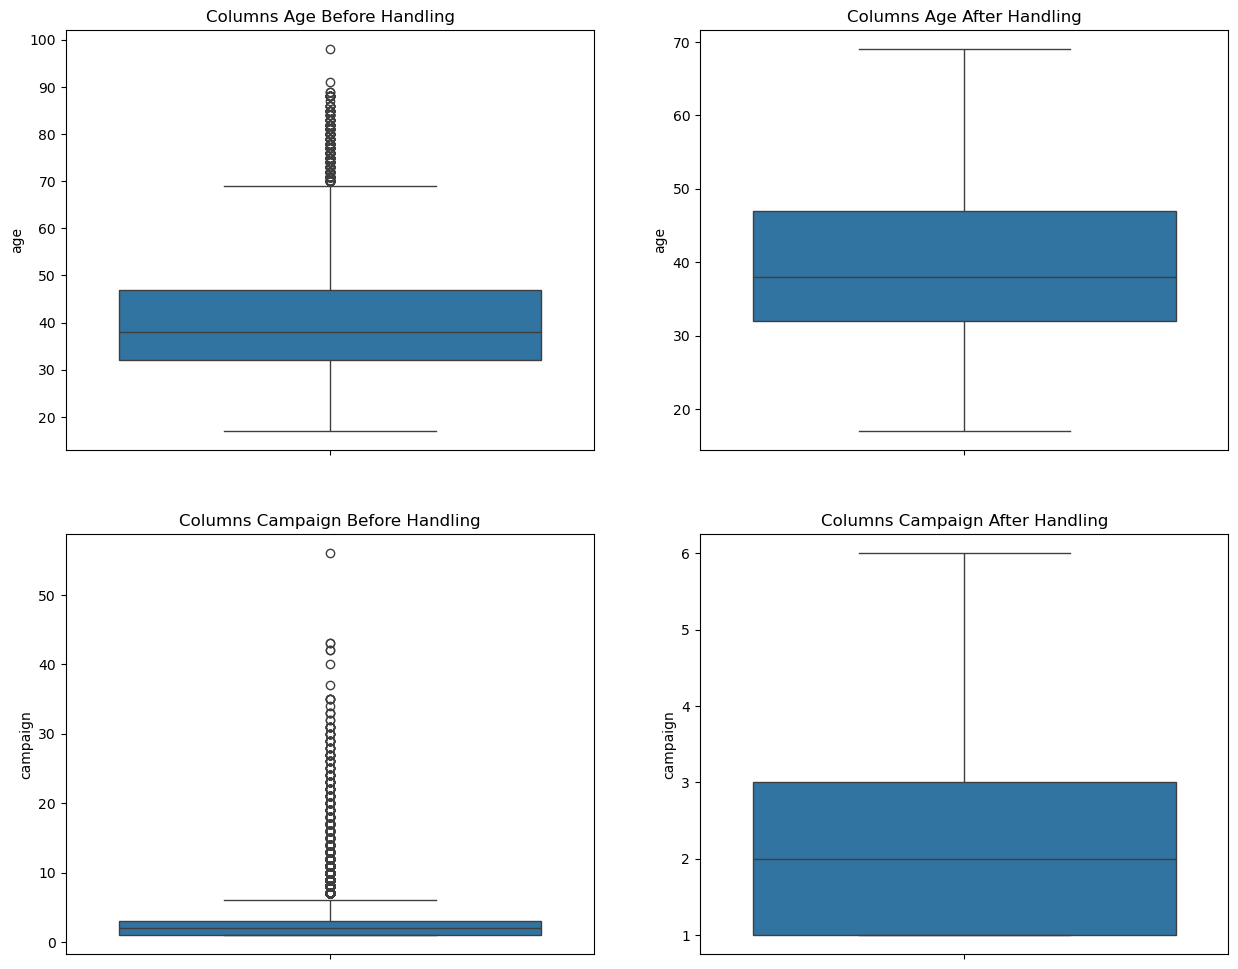

In [203]:
fig, ax =plt.subplots(2, 2, figsize=(15,12))

sns.boxplot(df_bef_out['age'], ax=ax[0][0])
ax[0][0].set_title('Columns Age Before Handling')

sns.boxplot(df['age'], ax=ax[0][1])
ax[0][1].set_title('Columns Age After Handling')

sns.boxplot(df_bef_out['campaign'], ax=ax[1][0])
ax[1][0].set_title('Columns Campaign Before Handling')

sns.boxplot(df['campaign'], ax=ax[1][1])
ax[1][1].set_title('Columns Campaign After Handling')

plt.show()

In [204]:
print(f"Data Sebelum Handling Outlier : {df_bef_out.shape}")
print(f"Data Sesudah Handling Outlier : {df.shape}")

Data Sebelum Handling Outlier : (32942, 17)
Data Sesudah Handling Outlier : (30671, 17)


In [205]:
df = df[df['education'] != 'illiterate']

#### Feature Transformation

In [206]:
df['job'] = df['job'].replace({'unknown' : df['job'].mode()[0]})
df['marital'] = df['marital'].replace({'unknown' : df['marital'].mode()[0]})
df['education'] = df['education'].replace({'unknown' : df['education'].mode()[0]})
df['housing'] = df['housing'].replace({'unknown' : df['housing'].mode()[0]})
df['loan'] = df['loan'].replace({'unknown' : df['loan'].mode()[0]})
df['default'] = df['default'].replace({'unknown' : df['default'].mode()[0]})
df['y'] = df['y'].replace({'no' : 0,
                           'yes' : 1})

In [207]:
lab = LabelEncoder()
df['job'] = lab.fit_transform(df['job'])

df['marital'] = df['marital'].replace({'married' : 2,
                                       'single' : 1,
                                       'divorced' : 0})

df['month'] = df['month'].replace({'mar' : 0,
                                   'apr' : 0,
                                   'may' : 0,
                                   'jun' : 0,
                                   'jul' : 1,
                                   'aug' : 1,
                                   'sep' : 1,
                                   'oct' : 1,
                                   'nov' : 1,
                                   'dec' : 1})


df['day_of_week'] = df['day_of_week'].replace({'fri' : 0,
                                               'mon' : 1,
                                               'tue' : 2,
                                               'wed' : 3,
                                               'thu' : 4})

df['education'] = df['education'].replace({'university.degree' : 5,
                                           'professional.course' : 4,
                                           'high.school' : 3,
                                           'basic.9y' : 2,
                                           'basic.6y' : 1,
                                           'basic.4y' : 0})

df['contact'] = df['contact'].replace({'cellular' : 1,
                                       'telephone' : 0})

df['housing'] = df['housing'].replace({'no' : 0,
                                       'yes' : 1})

df['loan'] = df['loan'].replace({'no' : 0,
                                 'yes' : 1})

df['poutcome'] = df['poutcome'].replace({'nonexistent' : 0,
                                         'failure' : 0,
                                         'success' : 1})

In [208]:
df.T

,0,1,3,4,5,6,7,8,9,10,...,32939,32940,32941,32942,32943,32945,32946,32947,32948,32949
age,49,37,36,59,29,26,30,50,33,44,...,39,30,28,44,47,28,52,54,29,35
job,1,2,0,5,0,8,1,1,0,7,...,1,4,1,2,0,7,9,0,0,0
marital,2,2,2,0,1,1,2,2,1,0,...,2,2,1,2,2,1,2,2,2,2
education,2,5,5,5,5,2,0,0,3,3,...,1,5,2,4,2,3,4,2,5,5
default,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,0,0,1,0,0,0,1,0,1,1,...,1,0,1,1,1,1,1,0,0,0
loan,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
contact,1,0,0,1,1,0,1,0,1,1,...,0,1,1,0,0,1,1,1,0,0
month,1,1,0,0,1,1,1,0,1,1,...,0,1,0,1,1,1,1,1,0,0
day_of_week,3,3,1,2,3,3,3,0,2,1,...,2,1,4,1,0,2,0,1,0,2


#### Feature Engineering

In [209]:
accpt_phone = []

for val_acc in df['duration']:
    if val_acc <= 60 :
        val = 0
    else :
        val = 1
    accpt_phone.append(val)

df['accpt_phone'] = accpt_phone

In [210]:
df['loan'] = df['loan'] + df['housing']

value_loan = []

for val_loan in df['loan']:
    if val_loan == 0 :
        val = 0
    else : 
        val = 1
    value_loan.append(val)

df['loan'] = value_loan

In [211]:
df.T

,0,1,3,4,5,6,7,8,9,10,...,32939,32940,32941,32942,32943,32945,32946,32947,32948,32949
age,49,37,36,59,29,26,30,50,33,44,...,39,30,28,44,47,28,52,54,29,35
job,1,2,0,5,0,8,1,1,0,7,...,1,4,1,2,0,7,9,0,0,0
marital,2,2,2,0,1,1,2,2,1,0,...,2,2,1,2,2,1,2,2,2,2
education,2,5,5,5,5,2,0,0,3,3,...,1,5,2,4,2,3,4,2,5,5
default,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,0,0,1,0,0,0,1,0,1,1,...,1,0,1,1,1,1,1,0,0,0
loan,0,0,1,0,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1
contact,1,0,0,1,1,0,1,0,1,1,...,0,1,1,0,0,1,1,1,0,0
month,1,1,0,0,1,1,1,0,1,1,...,0,1,0,1,1,1,1,1,0,0
day_of_week,3,3,1,2,3,3,3,0,2,1,...,2,1,4,1,0,2,0,1,0,2


#### Feature Selection

<Axes: >

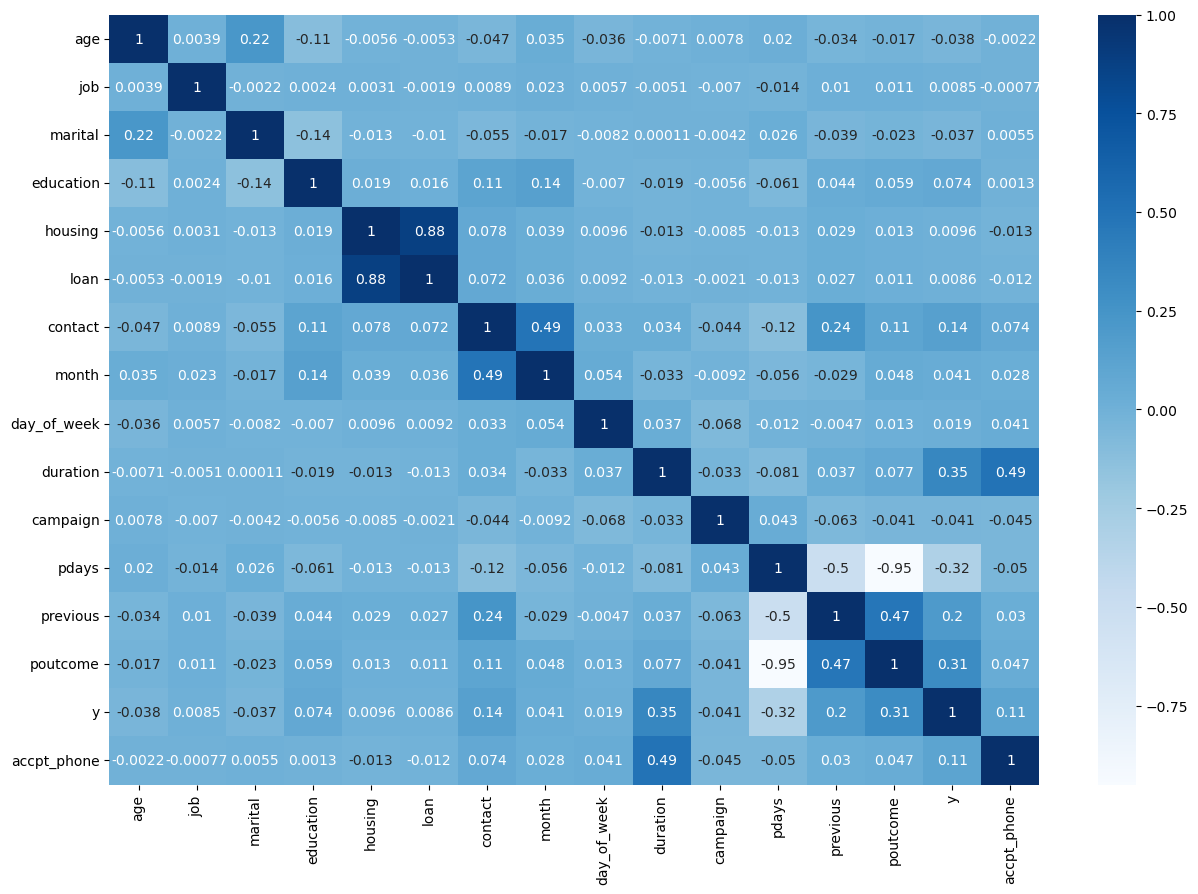

In [212]:
corel = df.corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(corel, annot=True, cmap='Blues')

In [213]:
df.drop(columns=['default', 'housing', 'duration', 'pdays', 'poutcome', 'sum_campaign'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30656 entries, 0 to 32949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          30656 non-null  int64
 1   job          30656 non-null  int32
 2   marital      30656 non-null  int64
 3   education    30656 non-null  int64
 4   loan         30656 non-null  int64
 5   contact      30656 non-null  int64
 6   month        30656 non-null  int64
 7   day_of_week  30656 non-null  int64
 8   campaign     30656 non-null  int64
 9   previous     30656 non-null  int64
 10  y            30656 non-null  int64
 11  accpt_phone  30656 non-null  int64
dtypes: int32(1), int64(11)
memory usage: 3.9 MB


In [214]:
df.T

,0,1,3,4,5,6,7,8,9,10,...,32939,32940,32941,32942,32943,32945,32946,32947,32948,32949
age,49,37,36,59,29,26,30,50,33,44,...,39,30,28,44,47,28,52,54,29,35
job,1,2,0,5,0,8,1,1,0,7,...,1,4,1,2,0,7,9,0,0,0
marital,2,2,2,0,1,1,2,2,1,0,...,2,2,1,2,2,1,2,2,2,2
education,2,5,5,5,5,2,0,0,3,3,...,1,5,2,4,2,3,4,2,5,5
loan,0,0,1,0,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1
contact,1,0,0,1,1,0,1,0,1,1,...,0,1,1,0,0,1,1,1,0,0
month,1,1,0,0,1,1,1,0,1,1,...,0,1,0,1,1,1,1,1,0,0
day_of_week,3,3,1,2,3,3,3,0,2,1,...,2,1,4,1,0,2,0,1,0,2
campaign,4,2,2,2,2,1,2,1,5,5,...,1,5,1,3,3,1,1,4,1,3
previous,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


#### Handling Imbalanced Data

In [215]:
from imblearn import over_sampling

y = df['y']
x = df.drop(columns=['y'])

x_over, y_over = over_sampling.RandomOverSampler().fit_resample(x,y)

print(f"Before Handling Imbalanced Data : ")
print(y.value_counts())
print(f"")
print(f"After Handling Imbalanced Data :")
print(y_over.value_counts())

Before Handling Imbalanced Data : 
0    27204
1     3452
Name: y, dtype: int64

After Handling Imbalanced Data :
0    27204
1    27204
Name: y, dtype: int64


In [216]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=42)

In [217]:
print(f"Data Train (x_train) Size : {x_train.shape}")
print(f"Data Test (x_test) Size : {x_test.shape}")
print(f"Data Train (y_train) Size : {y_train.shape}")
print(f"Data Test (y_test) Size : {y_test.shape}")

Data Train (x_train) Size : (43526, 11)
Data Test (x_test) Size : (10882, 11)
Data Train (y_train) Size : (43526,)
Data Test (y_test) Size : (10882,)


#### Feature Scaling

In [218]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43526.0,39.330400,10.446010,17.0,31.0,37.0,47.0,69.0
job,43526.0,3.722212,3.620385,0.0,0.0,2.0,7.0,10.0
marital,43526.0,1.474521,0.673435,0.0,1.0,2.0,2.0,2.0
education,43526.0,3.400037,1.598021,0.0,2.0,4.0,5.0,5.0
loan,43526.0,0.616643,0.486210,0.0,0.0,1.0,1.0,1.0
contact,43526.0,0.721913,0.448061,0.0,0.0,1.0,1.0,1.0
month,43526.0,0.480724,0.499634,0.0,0.0,0.0,1.0,1.0
day_of_week,43526.0,2.058287,1.415311,0.0,1.0,2.0,3.0,4.0
campaign,43526.0,1.979024,1.231707,1.0,1.0,2.0,3.0,6.0
previous,43526.0,0.313904,0.694247,0.0,0.0,0.0,0.0,6.0


In [219]:
from sklearn.preprocessing import MinMaxScaler

scaling = ['age', 'job', 'marital', 'month', 'campaign', 'previous', 'day_of_week', 'education']
minmax = MinMaxScaler()

for data_scal in range(0, len(scaling)):
    x_train[scaling[data_scal]] = minmax.fit_transform(x_train[scaling[data_scal]].values.reshape(len(x_train), 1))

for data_scal_2 in range(0, len(scaling)):
    x_test[scaling[data_scal_2]] = minmax.fit_transform(x_test[scaling[data_scal_2]].values.reshape(len(x_test),1))

In [220]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43526.0,0.429431,0.200885,0.0,0.269231,0.384615,0.576923,1.0
job,43526.0,0.372221,0.362038,0.0,0.000000,0.200000,0.700000,1.0
marital,43526.0,0.737260,0.336718,0.0,0.500000,1.000000,1.000000,1.0
education,43526.0,0.680007,0.319604,0.0,0.400000,0.800000,1.000000,1.0
loan,43526.0,0.616643,0.486210,0.0,0.000000,1.000000,1.000000,1.0
contact,43526.0,0.721913,0.448061,0.0,0.000000,1.000000,1.000000,1.0
month,43526.0,0.480724,0.499634,0.0,0.000000,0.000000,1.000000,1.0
day_of_week,43526.0,0.514572,0.353828,0.0,0.250000,0.500000,0.750000,1.0
campaign,43526.0,0.195805,0.246341,0.0,0.000000,0.200000,0.400000,1.0
previous,43526.0,0.052317,0.115708,0.0,0.000000,0.000000,0.000000,1.0


## **Data Modelling**

In [265]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [222]:
models = [('Decision Tree', DecisionTreeClassifier()),
          ('Logistic Regression', LogisticRegression()),
          ('Support Vector Machine', SVC()),
          ('K-NN', KNeighborsClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('Gradient Boosting', GradientBoostingClassifier()),
          ('XgBoost', XGBClassifier())]

In [223]:
def eval_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    TP, FN, FP, TN = cm.ravel()
    return TP, FN, FP, TN

def eval_cm(TP, FN, FP, TN):
    accuracy = ((TP + TN)/(TP + FN + + FP + TN))
    precision = (TP/(TP + FP))
    recall = (TP/(TP + FN))
    f1_score = (2/((1/precision)+(1/recall)))
    return accuracy, precision, recall, f1_score

def eval_metric(model, x_test, y_test):
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    return accuracy, precision, recall, f1

#### Training Data

In [224]:
result_cm = []

for name, model in models:
    model.fit(x_train, y_train)
    accuracy, precision, recall, f1 = eval_metric(model, x_train, y_train)
    accuracy_score_test, precision_score_test, recall_score_test, f1_score_test = eval_metric(model, x_test, y_test)

    result_cm.append([name,
                      accuracy,
                      accuracy_score_test,
                      precision,
                      precision_score_test, 
                      recall,
                      recall_score_test, 
                      f1,
                      f1_score_test])

In [225]:
result_model_met = pd.DataFrame(result_cm, columns=['Models',
                                                    'accuracy_train',
                                                    'accuracy_test',
                                                    'precision_train',
                                                    'precision_test',
                                                    'recall_train',
                                                    'recall_test',
                                                    'f1_score_train',
                                                    'f1_score_test'])
result_model_met

,Models,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_score_train,f1_score_test
0,Decision Tree,0.985066,0.923819,0.972587,0.869187,0.998302,0.997047,0.985277,0.928737
1,Logistic Regression,0.657102,0.649881,0.635942,0.628640,0.736620,0.725175,0.682589,0.673466
2,Support Vector Machine,0.691472,0.689120,0.696978,0.692235,0.678647,0.676264,0.687690,0.684156
3,K-NN,0.895855,0.849568,0.832185,0.778794,0.991967,0.974714,0.905078,0.865809
4,Random Forest,0.985066,0.949642,0.971912,0.909657,0.999036,0.997970,0.985287,0.951769
5,AdaBoost,0.663626,0.659713,0.661469,0.655485,0.671762,0.667220,0.666576,0.661301
6,Gradient Boosting,0.689496,0.683790,0.698108,0.689332,0.668916,0.664267,0.683200,0.676567
7,XgBoost,0.802417,0.748024,0.797975,0.757803,0.810429,0.725914,0.804154,0.741516


In [230]:
result_model_met[['Models', 'f1_score_test']]

,Models,f1_score_test
0,Decision Tree,0.928737
1,Logistic Regression,0.673466
2,Support Vector Machine,0.684156
3,K-NN,0.865809
4,Random Forest,0.951769
5,AdaBoost,0.661301
6,Gradient Boosting,0.676567
7,XgBoost,0.741516


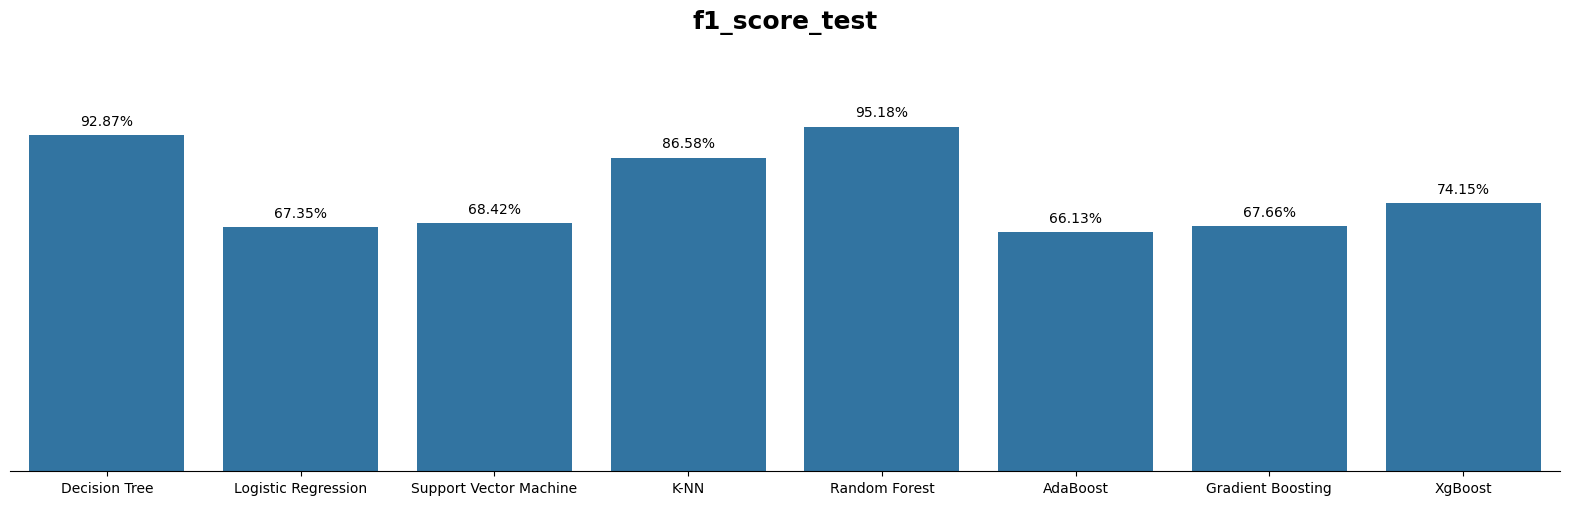

In [291]:
#Visualization DatFrame Training Result
data_result_vis = result_model_met[['Models', 'f1_score_test']]
data_result_columns = data_result_vis.drop(columns=['Models']).columns

plt.figure(figsize=(20,35))
for vis_result in range(0, len(data_result_columns)):
    plt.subplot(5, 1, vis_result+1)
    plt.grid(visible=False)
    plt.subplots_adjust(hspace=0.3)
    vis = sns.barplot(data=data_result_vis, x=data_result_vis.columns[0], y=result_model_met[data_result_columns[vis_result]])
    sns.despine(left=True)
    plt.title(data_result_columns[vis_result], weight='bold', fontsize=18)
    plt.xlabel("")
    plt.yticks([])
    plt.ylabel("")
    plt.ylim(0, 1.2)

    def percen(data):
        return "{:,.2f}%".format(data*100)

    for annot_vis in vis.patches:
        plt.annotate(percen(annot_vis.get_height()),
                     (annot_vis.get_x() + annot_vis.get_width()/2, annot_vis.get_height()),
                     va='center', ha='center',
                     xytext=(0,10),
                     textcoords='offset points')

plt.show()

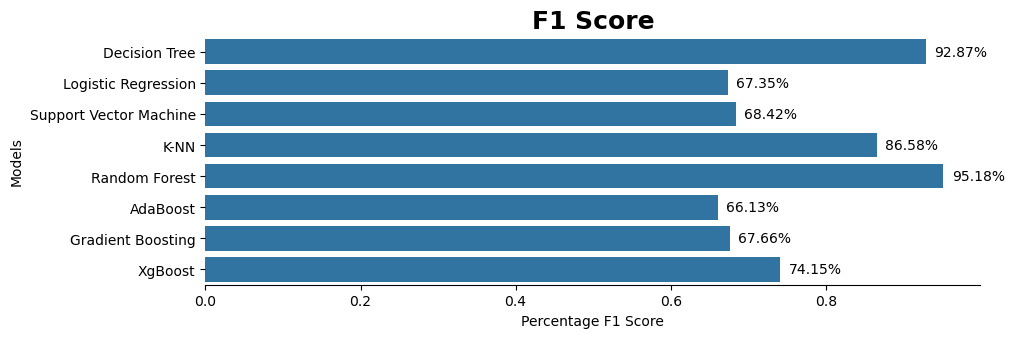

In [313]:
#Visualization DatFrame Training Result
data_result_vis = result_model_met[['Models', 'f1_score_test']]
data_result_columns = data_result_vis.drop(columns=['Models']).columns

plt.figure(figsize=(10,20))
for vis_result in range(0, len(data_result_columns)):
    plt.subplot(5, 1, vis_result+1)
    plt.grid(visible=False)
    plt.subplots_adjust(hspace=0.3)
    vis = sns.barplot(data=data_result_vis, y=data_result_vis.columns[0], x=result_model_met[data_result_columns[vis_result]])
    sns.despine(left=True)
    plt.title('F1 Score', weight='bold', fontsize=18)
    plt.xlabel("Percentage F1 Score")

def percen(data):
    return "{:,.2f}%".format(data*100)

for annot_vis in vis.patches:
    plt.annotate(percen(annot_vis.get_width()),
                 (annot_vis.get_width(), annot_vis.get_y() + annot_vis.get_height()/2),
                 va='center', ha='center',
                 xytext=(25,0),
                 textcoords='offset points')

plt.show()

## **Hyperparameter Tuning**

In [242]:
from scipy.stats import uniform, randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer

param_grid = {
    'n_estimators' : np.arange(100, 1000),
    'criterion' : ("gini", "entropy"),
    'min_samples_split' : np.arange(0,10)
    }

In [244]:
#f1_scorer = make_scorer(f1_score, average='macro')
model_hyparam = RandomForestClassifier()
model_hyper = RandomizedSearchCV(model_hyparam, param_distributions=param_grid, cv=5, n_jobs=4, scoring='f1', verbose=2, random_state=42)
model_hyper.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139...
       919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931,
       932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944,
       945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957,
       958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970,
       971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983,
       984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996,
       997, 998, 999])},
                   random_state=42, scoring='f1', verbose=2)

In [245]:
print(f"Best Params : {model_hyper.best_params_}")
print(f"Best Score : {model_hyper.best_score_}")

Best Params : {'n_estimators': 663, 'min_samples_split': 2, 'criterion': 'entropy'}
Best Score : 0.9422343267443682


#### Apply Final Model

In [246]:
best_model = model_hyper.best_estimator_

In [247]:

y_predict = best_model.predict(x_test)
accuracy_score_fin, precision_score_fin, recall_score_fin, f1_score_fin = eval_metric(best_model, x_test, y_test)
result_model_fin = [["RandomForestClassifier", accuracy_score_fin, precision_score_fin, recall_score_fin, f1_score_fin]]

res_model_fin = pd.DataFrame(result_model_fin, columns=['Models',
                                                        "accuracy_finm",
                                                        "precision_finm",
                                                        "recall_finm",
                                                        "f1_score_finm"])
res_model_fin

,Models,accuracy_finm,precision_finm,recall_finm,f1_score_finm
0,RandomForestClassifier,0.949917,0.910116,0.99797,0.95202


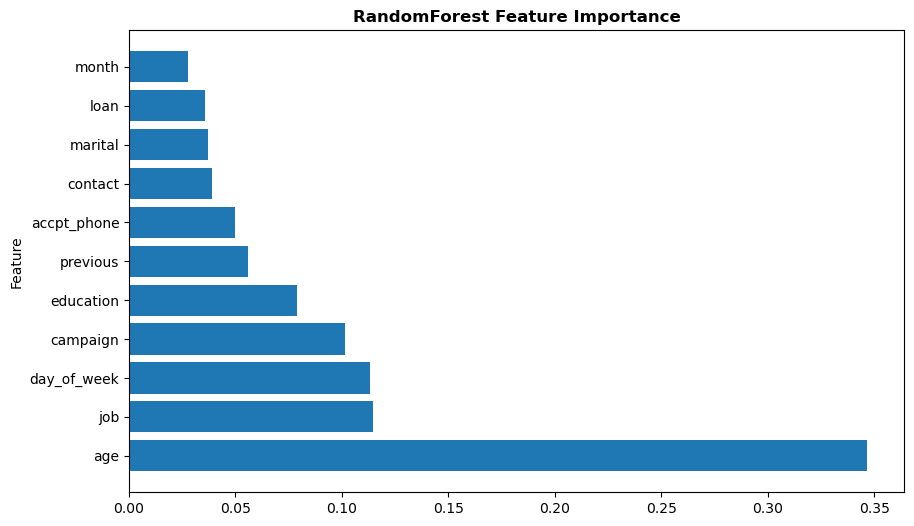

In [253]:
feature_important = best_model.feature_importances_
feature_name = list(x_train.columns)

df_importance = pd.DataFrame({'Feature' : feature_name, 'Importance' : feature_important})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForest Feature Importance', weight='bold')
plt.xlabel("")

plt.show()

## Business Simulation

<Axes: xlabel='Deposit'>

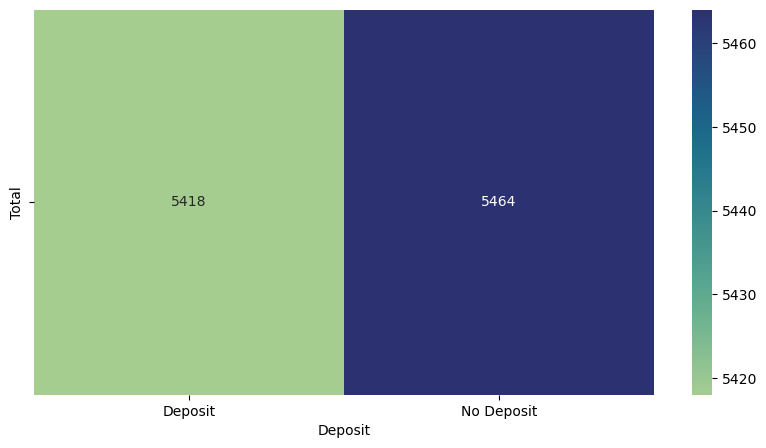

In [254]:
y_sim = y_test.value_counts().reset_index()
y_sim.columns=['Deposit', 'Total']
y_sim['Deposit'] = y_sim['Deposit'].replace({1 : 'Deposit',
                                         0 : 'No Deposit'})
y_sim = y_sim.pivot_table(index=None, columns='Deposit', values='Total')


plt.figure(figsize=(10,5))
sns.heatmap(y_sim, annot=True, fmt='d', cmap='crest')

In [257]:
from sklearn.metrics import classification_report

y_predict_report = best_model.predict(x_test)
report = classification_report(y_test, y_predict_report)

In [264]:
print(classification_report(y_test, y_predict_report))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      5464
           1       0.91      1.00      0.95      5418

    accuracy                           0.95     10882
   macro avg       0.95      0.95      0.95     10882
weighted avg       0.95      0.95      0.95     10882



<Figure size 1500x1000 with 0 Axes>

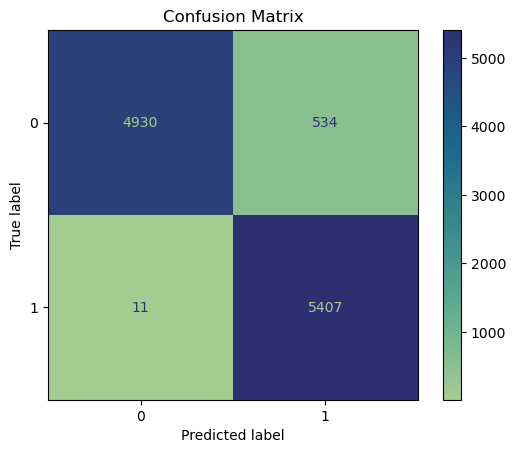

In [275]:
disp = ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test, cmap='crest')
disp.ax_.set_title('Confusion Matrix')

plt.show()